In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
y=[]

df=pd.read_csv("cleaned_kickstarter_v4.csv")
X=df[["goal","duration","category.parent_name","category.slug","created_month","country","currency","creator.backing_action_count"]]
k = df['state']
for i in k:
    if i == "successful":
        y.append(1)
    else:
        y.append(0)



In [2]:
pd.read_csv("cleaned_kickstarter_v4.csv")['created_month'].value_counts()

created_month
Jan    21961
Mar    21890
Apr    19803
Feb    19677
May    19370
Jul    18637
Aug    17793
Oct    17686
Sep    17595
Jun    17085
Nov    16386
Dec    14467
Name: count, dtype: int64

In [3]:
y=pd.Series(y)

In [4]:
X_cat = X[["category.parent_name", "category.slug", "country", "currency","created_month"]]
X_cat = pd.get_dummies(X_cat)

X_num = X[["goal", "duration","creator.backing_action_count"]]
X = pd.concat([X_num, X_cat], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [5]:




model = LGBMClassifier()




print(f"Training the LightGBM model with NH")
model.fit(X_train, y_train)
print("Training complete.")

# --- Predict ---
predictions = model.predict(X_test)
predictions = pd.Series(predictions, index=X_test.index, name="Predicted")
print(predictions.head())

# --- Predict probabilities (if classification) ---

probabilities = model.predict_proba(X_test)
print(probabilities[:5])


Training the LightGBM model with NH
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 116671, number of negative: 61209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 833
[LightGBM] [Info] Number of data points in the train set: 177880, number of used features: 238
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.655897 -> initscore=0.645064
[LightGBM] [Info] Start training from score 0.645064
Training complete.
25817     1
123948    1
198120    0
198498    0
119001    1
Name: Predicted, dtype: int64
[[0.04980067 0.95019933]
 [0.21201821 0.78798179]
 [0.56404984 0.43595016]
 [0.57721626 0.42278374]
 [0.24001275 0.75998725]]


In [6]:
model.score(X_test, y_test)

0.7822352147515179

In [7]:
import joblib
joblib.dump(model, "LGBM_model.pkl")

['LGBM_model.pkl']

In [8]:
model1 = joblib.load("LGBM_model.pkl")
model1.score(X_test, y_test)

0.7822352147515179

In [9]:
X_cat

,category.parent_name_Art,category.parent_name_Comics,category.parent_name_Crafts,category.parent_name_Dance,category.parent_name_Design,category.parent_name_Fashion,category.parent_name_Film & Video,category.parent_name_Food,category.parent_name_Games,category.parent_name_Journalism,...,created_month_Dec,created_month_Feb,created_month_Jan,created_month_Jul,created_month_Jun,created_month_Mar,created_month_May,created_month_Nov,created_month_Oct,created_month_Sep
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222345,False,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
222346,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
222347,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
222348,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [10]:
import pandas as pd
import joblib
import numpy as np
model1 = joblib.load("LGBM_model.pkl")


CATEGORICAL_FEATURES = {
    "category.parent_name": ['Art', 'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video', 'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing', 'Technology', 'Theater'],
    "category.slug": ['art', 'art/ceramics', 'art/conceptual art', 'art/digital art', 'art/illustration', 'art/installations', 'art/mixed media', 'art/painting', 'art/performance art', 'art/public art', 'art/sculpture', 'art/social practice', 'art/textiles', 'art/video art', 'comics', 'comics/anthologies', 'comics/comic books', 'comics/events', 'comics/graphic novels', 'comics/webcomics', 'crafts', 'crafts/candles', 'crafts/crochet', 'crafts/diy', 'crafts/embroidery', 'crafts/glass', 'crafts/knitting', 'crafts/pottery', 'crafts/printing', 'crafts/quilts', 'crafts/stationery', 'crafts/taxidermy', 'crafts/weaving', 'crafts/woodworking', 'dance', 'dance/performances', 'dance/residencies', 'dance/spaces', 'dance/workshops', 'design', 'design/architecture', 'design/civic design', 'design/graphic design', 'design/interactive design', 'design/product design', 'design/toys', 'design/typography', 'fashion', 'fashion/accessories', 'fashion/apparel', 'fashion/childrenswear', 'fashion/couture', 'fashion/footwear', 'fashion/jewelry', 'fashion/pet fashion', 'fashion/ready-to-wear', 'film & video', 'film & video/action', 'film & video/animation', 'film & video/comedy', 'film & video/documentary', 'film & video/drama', 'film & video/experimental', 'film & video/family', 'film & video/fantasy', 'film & video/festivals', 'film & video/horror', 'film & video/movie theaters', 'film & video/music videos', 'film & video/narrative film', 'film & video/romance', 'film & video/science fiction', 'film & video/shorts', 'film & video/television', 'film & video/thrillers', 'film & video/webseries', 'food', 'food/bacon', 'food/community gardens', 'food/cookbooks', 'food/drinks', 'food/events', "food/farmer's markets", 'food/farms', 'food/food trucks', 'food/restaurants', 'food/small batch', 'food/spaces', 'food/vegan', 'games', 'games/gaming hardware', 'games/live games', 'games/mobile games', 'games/playing cards', 'games/puzzles', 'games/tabletop games', 'games/video games', 'journalism', 'journalism/audio', 'journalism/photo', 'journalism/print', 'journalism/video', 'journalism/web', 'music', 'music/blues', 'music/chiptune', 'music/classical music', 'music/comedy', 'music/country & folk', 'music/electronic music', 'music/faith', 'music/hip-hop', 'music/indie rock', 'music/jazz', 'music/kids', 'music/latin', 'music/metal', 'music/pop', 'music/punk', 'music/r&b', 'music/rock', 'music/world music', 'photography', 'photography/animals', 'photography/fine art', 'photography/nature', 'photography/people', 'photography/photobooks', 'photography/places', 'publishing', 'publishing/academic', 'publishing/anthologies', 'publishing/art books', 'publishing/calendars', "publishing/children's books", 'publishing/comedy', 'publishing/fiction', 'publishing/letterpress', 'publishing/literary journals', 'publishing/literary spaces', 'publishing/nonfiction', 'publishing/periodicals', 'publishing/poetry', 'publishing/radio & podcasts', 'publishing/translations', 'publishing/young adult', 'publishing/zines', 'technology', 'technology/3d printing', 'technology/apps', 'technology/camera equipment', 'technology/diy electronics', 'technology/fabrication tools', 'technology/flight', 'technology/gadgets', 'technology/hardware', 'technology/makerspaces', 'technology/robots', 'technology/software', 'technology/sound', 'technology/space exploration', 'technology/wearables', 'technology/web', 'theater', 'theater/comedy', 'theater/experimental', 'theater/festivals', 'theater/immersive', 'theater/musical', 'theater/plays', 'theater/spaces'],
    "country": ['AT', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB', 'GR', 'HK', 'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'PL', 'SE', 'SG', 'SI', 'US'],
    "created_month": ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
    "currency": ['AUD', 'CAD', 'CHF', 'DKK', 'EUR', 'GBP', 'HKD', 'JPY', 'MXN', 'NOK', 'NZD', 'PLN', 'SEK', 'SGD', 'USD'],
}




In [11]:
expected_cols = X.columns.tolist()

df2 = pd.DataFrame([[0] * len(expected_cols)], columns=expected_cols)


In [26]:
[i for i in expected_cols if 'country_' in i or 'created_month_' in i or 'currency_' in i]

['country_AT',
 'country_AU',
 'country_BE',
 'country_CA',
 'country_CH',
 'country_DE',
 'country_DK',
 'country_ES',
 'country_FR',
 'country_GB',
 'country_GR',
 'country_HK',
 'country_IE',
 'country_IT',
 'country_JP',
 'country_LU',
 'country_MX',
 'country_NL',
 'country_NO',
 'country_NZ',
 'country_PL',
 'country_SE',
 'country_SG',
 'country_SI',
 'country_US',
 'currency_AUD',
 'currency_CAD',
 'currency_CHF',
 'currency_DKK',
 'currency_EUR',
 'currency_GBP',
 'currency_HKD',
 'currency_JPY',
 'currency_MXN',
 'currency_NOK',
 'currency_NZD',
 'currency_PLN',
 'currency_SEK',
 'currency_SGD',
 'currency_USD',
 'created_month_Apr',
 'created_month_Aug',
 'created_month_Dec',
 'created_month_Feb',
 'created_month_Jan',
 'created_month_Jul',
 'created_month_Jun',
 'created_month_Mar',
 'created_month_May',
 'created_month_Nov',
 'created_month_Oct',
 'created_month_Sep']

In [12]:
import pandas as pd
cat = "Technology"
subcat = "gadgets"
df1 = pd.DataFrame([{
    "goal": 5000,
    "duration": 30,
    "category.parent_name_"+cat:1,
    "category.slug_"+cat.lower()+"/"+subcat:1,
    "created_month_Jan":1,
    "country_US":1,
    "currency_USD":1,
    "creator.backing_action_count": 2
}])
cat = cat.lower()
subcat = subcat.lower()

In [13]:
# Keep df1's columns first
final_columns = list(df1.columns) + [col for col in df2.columns if col not in df1.columns]

# Merge while keeping df1's values for shared columns
merged_df = pd.concat([df1, df2[[col for col in df2.columns if col not in df1.columns]]], axis=1)

# Reorder to ensure df1's columns come first
merged_df = merged_df[final_columns]

In [14]:
[i for i in merged_df.columns if i not in X.columns]

[]

In [15]:
merged_df['goal']= 1000000

In [16]:
model1.predict_proba(merged_df)[:, 1]

array([0.33839133])

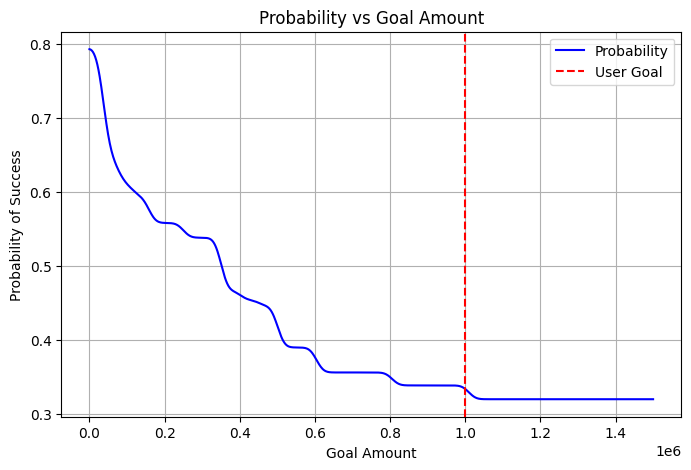

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Parameters
goal_original = merged_df['goal'].values[0]
num_points = 1000  # fewer points than 10k for speed & clarity
spread = goal_original * 0.5  # +/- 50% spread

# Generate equally spaced values
goal_values = np.linspace(0, goal_original + spread, num_points)

# Keep other features constant
X_varied = pd.DataFrame(np.repeat(merged_df.values, num_points, axis=0), columns=merged_df.columns)
X_varied['goal'] = goal_values

# Predict probabilities
probabilities = model.predict_proba(X_varied)[:, 1]

# Smooth the curve with a Gaussian filter
smoothed_probabilities = gaussian_filter1d(probabilities, sigma=10)  # sigma controls smoothness

# Plot
plt.figure(figsize=(8, 5))
plt.plot(goal_values, smoothed_probabilities, color='blue', label='Probability')
plt.axvline(goal_original, color='red', linestyle='--', label='User Goal')
plt.xlabel('Goal Amount')
plt.ylabel('Probability of Success')
plt.title('Probability vs Goal Amount')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
merged_df

,goal,duration,category.parent_name_Technology,category.slug_technology/gadgets,created_month_Jan,country_US,currency_USD,creator.backing_action_count,category.parent_name_Art,category.parent_name_Comics,...,created_month_Aug,created_month_Dec,created_month_Feb,created_month_Jul,created_month_Jun,created_month_Mar,created_month_May,created_month_Nov,created_month_Oct,created_month_Sep
0,1000000,30,1,1,1,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0


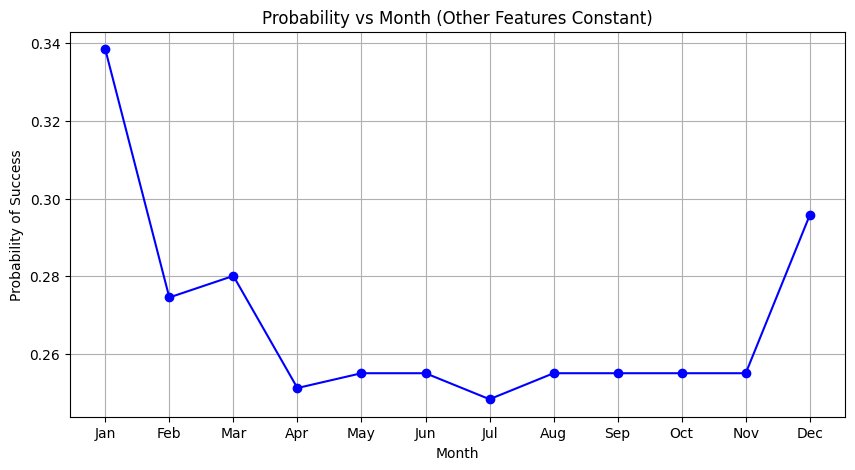

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume merged_df is the user's row and model is trained
month_cols = ['created_month_Jan','created_month_Feb','created_month_Mar','created_month_Apr',
              'created_month_May','created_month_Jun','created_month_Jul','created_month_Aug',
              'created_month_Sep','created_month_Oct','created_month_Nov','created_month_Dec']

probabilities = []

for month in month_cols:
    X_temp = merged_df.copy()
    
    # Set all months to 0
    X_temp[month_cols] = 0
    
    # Set current month to 1
    X_temp[month] = 1
    
    # Predict probability
    prob = model.predict_proba(X_temp)[:, 1][0]
    probabilities.append(prob)

# Plot
plt.figure(figsize=(10,5))
plt.plot([m.split('_')[-1] for m in month_cols], probabilities, marker='o', color='blue')
plt.title('Probability vs Month (Other Features Constant)')
plt.xlabel('Month')
plt.ylabel('Probability of Success')
plt.grid(True)
plt.show()


In [20]:
# Get all sub-category columns
subcat_cols = [col for col in merged_df.columns if col.startswith('category.slug_')]

# Initialize dictionary
parent_subcat_dict = {}

for col in subcat_cols:
    # Remove 'category.slug_' prefix
    cat_full = col.replace('category.slug_', '')
    
    # Split by '/' if hierarchical (parent/sub)
    if '/' in cat_full:
        parent, sub = cat_full.split('/', 1)
    else:
        parent, sub = cat_full, cat_full  # if no slash, parent = sub
    
    if parent not in parent_subcat_dict:
        parent_subcat_dict[parent] = []
    parent_subcat_dict[parent].append(sub)

# Example: print the dictionary
for parent, subs in parent_subcat_dict.items():
    print(f"{parent}: {subs}")


technology: ['gadgets', 'technology', '3d printing', 'apps', 'camera equipment', 'diy electronics', 'fabrication tools', 'flight', 'hardware', 'makerspaces', 'robots', 'software', 'sound', 'space exploration', 'wearables', 'web']
art: ['art', 'ceramics', 'conceptual art', 'digital art', 'illustration', 'installations', 'mixed media', 'painting', 'performance art', 'public art', 'sculpture', 'social practice', 'textiles', 'video art']
comics: ['comics', 'anthologies', 'comic books', 'events', 'graphic novels', 'webcomics']
crafts: ['crafts', 'candles', 'crochet', 'diy', 'embroidery', 'glass', 'knitting', 'pottery', 'printing', 'quilts', 'stationery', 'taxidermy', 'weaving', 'woodworking']
dance: ['dance', 'performances', 'residencies', 'spaces', 'workshops']
design: ['design', 'architecture', 'civic design', 'graphic design', 'interactive design', 'product design', 'toys', 'typography']
fashion: ['fashion', 'accessories', 'apparel', 'childrenswear', 'couture', 'footwear', 'jewelry', 'pe

In [21]:
merged_df.columns.tolist()

['goal',
 'duration',
 'category.parent_name_Technology',
 'category.slug_technology/gadgets',
 'created_month_Jan',
 'country_US',
 'currency_USD',
 'creator.backing_action_count',
 'category.parent_name_Art',
 'category.parent_name_Comics',
 'category.parent_name_Crafts',
 'category.parent_name_Dance',
 'category.parent_name_Design',
 'category.parent_name_Fashion',
 'category.parent_name_Film & Video',
 'category.parent_name_Food',
 'category.parent_name_Games',
 'category.parent_name_Journalism',
 'category.parent_name_Music',
 'category.parent_name_Photography',
 'category.parent_name_Publishing',
 'category.parent_name_Theater',
 'category.slug_art',
 'category.slug_art/ceramics',
 'category.slug_art/conceptual art',
 'category.slug_art/digital art',
 'category.slug_art/illustration',
 'category.slug_art/installations',
 'category.slug_art/mixed media',
 'category.slug_art/painting',
 'category.slug_art/performance art',
 'category.slug_art/public art',
 'category.slug_art/sculpt

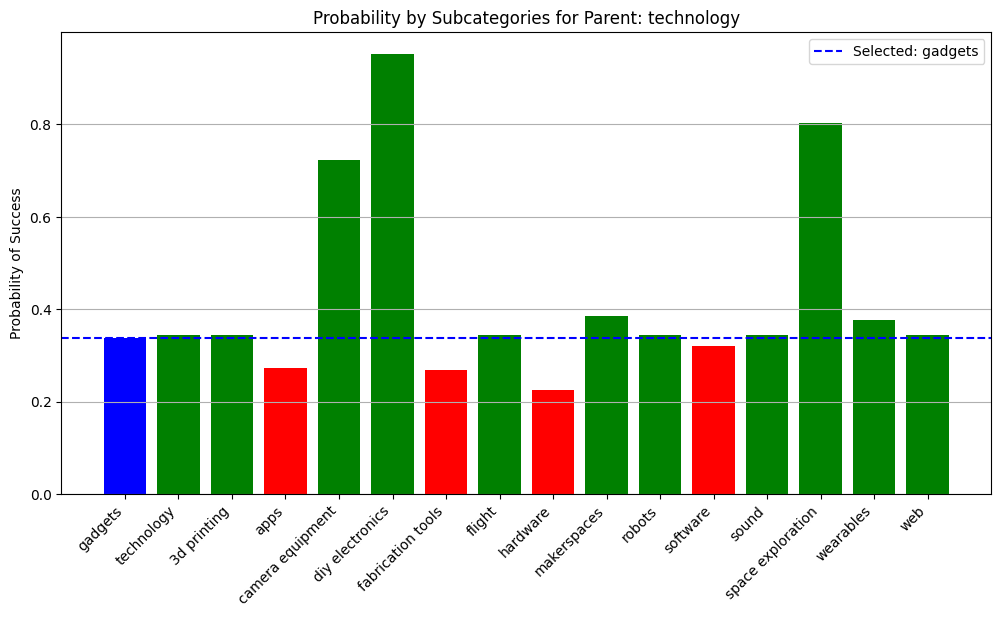

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Get all subcategories for the chosen parent
subs = parent_subcat_dict[cat]

# Prepare DataFrame for predictions: copy user input for all subcats
X_temp = pd.concat([merged_df]*len(subs), ignore_index=True)

# Predict probabilities for each subcategory
probs = []
for s in subs:
    # Determine column name
    col_name1 = f'category.slug_{cat}/{s}'
    col_name2 = f'category.slug_{s}'
    if col_name1 in merged_df.columns:
        col_name = col_name1
    elif col_name2 in merged_df.columns:
        col_name = col_name2
    else:
        continue  # skip if neither column exists

    # Reset all subcategory columns for this parent
    for c in merged_df.columns:
        if c.startswith(f'category.slug_{cat}') or c.startswith(f'category.slug_{s}'):
            X_temp[c] = 0

    # Activate current subcategory
    X_temp.loc[X_temp.index[subs.index(s)], col_name] = 1

    # Predict probability for this subcategory
    prob = model.predict_proba(X_temp.iloc[[subs.index(s)]])[:, 1][0]
    probs.append(prob)

# Create bar colors
selected_index = subs.index(subcat)
colors = []
for i, p in enumerate(probs):
    if i == selected_index:
        colors.append('blue')  # selected subcategory
    elif p < probs[selected_index]:
        colors.append('red')   # lower probability
    else:
        colors.append('green') # higher probability

# Plot
plt.figure(figsize=(12,6))
plt.bar(subs, probs, color=colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Probability of Success')
plt.title(f'Probability by Subcategories for Parent: {cat}')
plt.axhline(probs[selected_index], color='blue', linestyle='--', label=f'Selected: {subcat}')
plt.legend()
plt.grid(axis='y')
plt.show()


In [23]:
from llama_cpp import Llama
import os

# === Configuration ===
# IMPORTANT: Replace this with the actual path to YOUR Llama 3 Instruct GGUF file.
# Example: "C:/Users/YourUser/models/Meta-Llama-3-8B-Instruct.Q4_K_M.gguf"
model_path = "Llama-3.2-1B-Instruct-Q5_K_S.gguf" 

# Check if the model file exists before proceeding
if not os.path.exists(model_path):
    print(f"Error: Model file not found at '{model_path}'")
    print("Please download a Llama 3 Instruct GGUF model and update the 'model_path' variable.")
else:
    try:
        # === Load the Model ===
        # The 'chat_format' argument is crucial for Instruct models.
        print("Loading model...")
        llm = Llama(
            model_path=model_path,
            chat_format="llama-3",  # Use "llama-2" for Llama 2 models
            n_gpu_layers=0,        # Set to 0 to run on CPU.
            n_ctx=512,            # Context window size.
            verbose=False          # Set to True to see more detailed output.
        )
        print("Model loaded successfully on CPU.")
        prompt = "Company makes keyboards with RGB lights and touchscreen display, it is a gaming keyboard, it has a 10-key number pad, it has a detachable cable, it has customizable RGB lighting, it has programmable keys, it has a wrist rest, it has a USB-C connection"
        # === Create the Chat Prompt ===
        # The 'create_chat_completion' function handles the prompt formatting.
        # You provide the conversation as a list of messages.
        messages = [
            {
                "role": "system", 
                "content": f"You are a helpful and friendly assistant who provides concise,and catchy blurbs with the provided context, the category of the product is {cat} and subcategory of the product is {subcat}."
            },
            {
                "role": "user", 
                "content": f"{prompt}"
            }
        ]
        
        print("\nGenerating response...")
        
        # === Run Inference ===
        response = llm.create_chat_completion(
            messages=messages,
            max_tokens=512,       # Max length of the generated response.
            temperature=0.7,      # Controls randomness. Lower is more predictable.
            stop=["<|eot_id|>"],  # Stop generation at the end-of-turn token.
        )

        # === Print the Response ===
        assistant_message = response['choices'][0]['message']['content']
        
        print("\n--- Assistant's Response ---")
        print(assistant_message.strip())
        
        # You can also see usage stats
        # print("\n--- Usage Stats ---")
        # print(f"Tokens used (prompt): {response['usage']['prompt_tokens']}")
        # print(f"Tokens used (completion): {response['usage']['completion_tokens']}")


    except Exception as e:
        print(f"An error occurred: {e}")

Loading model...


llama_context: n_ctx_per_seq (512) < n_ctx_train (131072) -- the full capacity of the model will not be utilized
ggml_metal_init: skipping kernel_get_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_set_rows_bf16                     (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_c4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_1row              (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_f32_l4                (not supported)
ggml_metal_init: skipping kernel_mul_mv_bf16_bf16                  (not supported)
ggml_metal_init: skipping kernel_mul_mv_id_bf16_f32                (not supported)
ggml_metal_init: skipping kernel_mul_mm_bf16_f32                   (not supported)
ggml_metal_init: skipping kernel_mul_mm_id_bf16_f16                (not supported)
ggml_metal_init: skipping kernel_flash_attn_ext_bf16_h64 

Model loaded successfully on CPU.

Generating response...

--- Assistant's Response ---
This is a gaming keyboard! Here's a concise and catchy blurb to describe it:

"Unleash your gaming fury with this beast of a keyboard, packed with RGB lights, a 10-key number pad, and a detachable cable. With customizable lighting, programmable keys, and a wrist rest, you'll be the master of your gaming space. And to top it all off, it's USB-C connected, making it the ultimate gaming setup for the serious gamer!"
